# Portable long-term zone comfort analytics
Brick metadata schema enables portable data analytics in building science. This IPython notebook uses this technology to evalute long-term thermal comfort over 35 buildings in Mortar Database.  
Aug. 2021

### Initiate Mortar API

In [1]:
import pymortar
import pandas as pd
import re

# connect client to Mortar frontend server
client = pymortar.Client("https://beta-api.mortardata.org")

### Write a query using Brick

In [2]:
query = """SELECT ?sensor ?vav ?zone WHERE {{
    ?sensor a brick:Zone_Air_Temperature_Sensor .
    ?sensor brick:isPointOf ?vav .
    ?vav brick:feeds ?zone .
    ?zone a brick:HVAC_Zone .
}}"""
# query = """SELECT ?sensor ?vav ?zone ?room ?floor WHERE {{
#     ?sensor a brick:Zone_Air_Temperature_Sensor .
#     ?sensor brick:isPointOf ?vav .
#     ?vav brick:feeds ?zone .
#     ?zone a brick:HVAC_Zone .
#     ?zone brick:hasPart ?room .
#     ?room a brick:Room .
#     ?room brick:isPartOf ?floor .
#     ?floor a brick:Floor .
# }}"""

In [3]:
# get which sites return results for the query above
qualify_resp = client.qualify([query])
print("Mortar has {0} qualifed sites".format(len(qualify_resp.sites)))
print(qualify_resp.sites)

Mortar has 25 qualifed sites
['artx', 'bwfp', 'chem', 'chemx', 'crus', 'dh', 'fdpd', 'gbsf', 'gha_ics', 'giedt', 'hart', 'hwc', 'mann', 'msb', 'music', 'roes', 'stor', 'thur', 'veih', 'vm3a', 'vmep', 'vmif', 'vmth', 'well', 'wsrc']


### Evaluate zone thermal comfort at one site

In [4]:
# get the brick metadata of the query sensors across all sites, except 'artx'
metadata_all = client.sparql(query, sites=qualify_resp.sites[1:2])

In [5]:
metadata_all

sensor  \
0   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
1   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
2   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
3   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
4   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
5   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
6   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
7   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
8   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
9   http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
10  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
11  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
12  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
13  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
14  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
15  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
16  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
17  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
18  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
19  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
20  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
21  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
22  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
23  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
24  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
25  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
26  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   
27  http://buildsys.org/ontologies/BWFP#BWFP.ZONE....   

                                                  vav  \
0   http://buildsys.org/ontologies/BWFP#VAVRM1130A...   
1       http://buildsys.org/ontologies/BWFP#VAVRM1203   
2       http://buildsys.org/ontologies/BWFP#VAVRM1107   
3   http://buildsys.org/ontologies/BWFP#VAVRM1130C...   
4   http://buildsys.org/ontologies/BWFP#VAVRM1101_MIX   
5       http://buildsys.org/ontologies/BWFP#VAVRM1201   
6   http://buildsys.org/ontologies/BWFP#VAVRM1201_MIX   
7      http://buildsys.org/ontologies/BWFP#VAVRM1205S   
8       http://buildsys.org/ontologies/BWFP#VAVRM1100   
9   http://buildsys.org/ontologies/BWFP#VAVRM1104S...   
10      http://buildsys.org/ontologies/BWFP#VAVRM1109   
11  http://buildsys.org/ontologies/BWFP#VAVRM1202_MIX   
12      http://buildsys.org/ontologies/BWFP#VAVRM1101   
13  http://buildsys.org/ontologies/BWFP#VAVRM1109_MIX   
14     http://buildsys.org/ontologies/BWFP#VAVRM1104S   
15  http://buildsys.org/ontologies/BWFP#VAVRM1130_MIX   
16      http://buildsys.org/ontologies/BWFP#VAVRM1106   
17  http://buildsys.org/ontologies/BWFP#VAVRM1205S...   
18      http://buildsys.org/ontologies/BWFP#VAVRM1202   
19  http://buildsys.org/ontologies/BWFP#VAVRM1109A...   
20     http://buildsys.org/ontologies/BWFP#VAVRM1130C   
21  http://buildsys.org/ontologies/BWFP#VAVRM1203_MIX   
22     http://buildsys.org/ontologies/BWFP#VAVRM1130A   
23      http://buildsys.org/ontologies/BWFP#VAVRM1130   
24     http://buildsys.org/ontologies/BWFP#VAVRM1109A   
25  http://buildsys.org/ontologies/BWFP#VAVRM1107_MIX   
26  http://buildsys.org/ontologies/BWFP#VAVRM1100_MIX   
27  http://buildsys.org/ontologies/BWFP#VAVRM1106_MIX   

                                               zone  site  
0   http://buildsys.org/ontologies/BWFP#RM1130A_MIX  bwfp  
1        http://buildsys.org/ontologies/BWFP#RM1203  bwfp  
2        http://buildsys.org/ontologies/BWFP#RM1107  bwfp  
3   http://buildsys.org/ontologies/BWFP#RM1130C_MIX  bwfp  
4    http://buildsys.org/ontologies/BWFP#RM1101_MIX  bwfp  
5        http://buildsys.org/ontologies/BWFP#RM1201  bwfp  
6    http://buildsys.org/ontologies/BWFP#RM1201_MIX  bwfp  
7       http://buildsys.org/ontologies/BWFP#RM1205S  bwfp  
8        http://buildsys.org/ontologies/BWFP#RM1100  bwfp  
9   http://buildsys.org/ontologies/BWFP#RM1104S_MIX  bwfp  
10       http://buildsys.org/ontologies/BWFP#RM1109  bwfp  
11   http://buildsy

In [13]:
# create multiple lists for storing results
res_dict = {}
# n_all is the number of zones that have summer or winter occupied data
# 
for i in ['n_all', 'p_sum', 'p_win', 'p_sum_lo', 'p_sum_up', 'p_win_lo', 'p_win_up',]:
    res_dict[i] = []
# evaluate each zone air temperature sensor data
for idxi, row in metadata_all.iterrows():
    meta_sensor = client.data_uris([row['sensor']])
    df = meta_sensor.data
    # parse the hour and weekday info and add it as a column
    df['hr'] = pd.to_datetime(df['time']).dt.hour
    df['wk'] = pd.to_datetime(df['time']).dt.dayofweek
    df['mo'] = pd.to_datetime(df['time']).dt.month
    # create occupied df by normal office hours and by weekdays
    df_occ = df[(df['hr'] >= 9) & (df['hr'] < 17) &
                (df['wk'] >= 0) & (df['wk'] <= 4)]
    # split the occupied data to the summer and  winter
    df_occ_sum = df_occ[(df_occ['mo'] >= 6) & (df_occ['mo'] <= 8)]
    df_occ_win = df_occ[(df_occ['mo'] >= 12) | (df_occ['mo'] <= 2)]
    
    # create lower and upper the temperature range df
    df_sum_lo = df_occ_sum[(df_occ_sum['value'] < 71.6)]
    df_sum_up = df_occ_sum[(df_occ_sum['value'] > 80.6)]
    df_win_lo = df_occ_win[(df_occ_win['value'] < 66.2)]
    df_win_up = df_occ_win[(df_occ_win['value'] > 77)]
    
    # the number of summer and winter occupied time
    n_occ_sum = len(df_occ_sum)
    n_occ_win = len(df_occ_win)
    n_occ_all = n_occ_sum + n_occ_win
    
    # the number of out of range summer occupied time
    n_sum_lo = len(df_sum_lo)
    n_sum_up = len(df_sum_up)
    n_sum_out = n_sum_lo + n_sum_up
    
    # the number of out of range winter occupied time
    n_win_lo = len(df_win_lo)
    n_win_up = len(df_win_lo)
    n_win_out = n_win_lo + n_win_up
    
    # calculate the percentage of out of range summer occupied time in all
    if n_occ_all != 0:
        res_dict['n_all'] += [1]
        p_sum = n_sum_out / n_occ_all
        p_win = n_win_out / n_occ_all

    # calculate the percentage of upper/lower of range occupied time in summer
    if n_occ_sum != 0:
        p_sum_lo = n_sum_lo / n_occ_sum
        p_sum_up = n_sum_up / n_occ_sum
        
    # calculate the percentage of upper/lower of range occupied time in  winter
    if n_occ_win != 0:
        p_win_lo = n_win_lo / n_occ_win
        p_win_up = n_win_up / n_occ_win
    
    # store the result into a 2d list
    res_dict['p_sum'] += [round(p_sum, 2)]
    res_dict['p_win'] += [round(p_win, 2)]
    res_dict['p_sum_lo'] += [round(p_sum_lo, 2)]
    res_dict['p_sum_up'] += [round(p_sum_up, 2)]
    res_dict['p_win_up'] += [round(p_win_up, 2)]
    res_dict['p_win_up'] += [round(p_win_up, 2)]

# Runtime

In [3]:
%%time
import pandas as pd
import re
import pymortar
# connect client to Mortar frontend server
client = pymortar.Client("https://beta-api.mortardata.org")

query = """SELECT ?sensor ?vav ?zone WHERE {{
    ?sensor a brick:Zone_Air_Temperature_Sensor .
    ?sensor brick:isPointOf ?vav .
    ?vav brick:feeds ?zone .
    ?zone a brick:HVAC_Zone .
}}"""

# get which sites return results for the query above
qualify_resp = client.qualify([query])
print("Mortar has {0} qualifed sites".format(len(qualify_resp.sites)))
print(qualify_resp.sites)

# get the brick metadata of the query sensors across all sites, except 'artx'
metadata_all = client.sparql(query, sites=qualify_resp.sites[1:])

# create multiple lists for storing results
res_dict = {}
# n_all is the number of zones that have summer or winter occupied data
# 
for i in ['p_out', 'p_sum_out', 'p_win_out', 'p_sum_lo', 'p_win_up']:
    res_dict[i] = []
# evaluate each zone air temperature sensor data
for idxi, row in metadata_all.iterrows():
    print("running on zone:", row['zone'])
    meta_sensor = client.data_uris([row['sensor']])
    df = meta_sensor.data
    # parse the hour and weekday info and add it as a column
    df['hr'] = pd.to_datetime(df['time']).dt.hour
    df['wk'] = pd.to_datetime(df['time']).dt.dayofweek
    df['mo'] = pd.to_datetime(df['time']).dt.month
    # create occupied df by normal office hours and by weekdays
    df_occ = df[(df['hr'] >= 9) & (df['hr'] < 17) &
                (df['wk'] >= 0) & (df['wk'] <= 4)]
    # split the occupied data to the summer and  winter
    df_occ_sum = df_occ[(df_occ['mo'] >= 6) & (df_occ['mo'] <= 8)]
    df_occ_win = df_occ[(df_occ['mo'] >= 12) | (df_occ['mo'] <= 2)]
    
    # create lower and upper the temperature range df
    df_sum_lo = df_occ_sum[(df_occ_sum['value'] < 71.6)]
    df_sum_up = df_occ_sum[(df_occ_sum['value'] > 80.6)]
    df_win_lo = df_occ_win[(df_occ_win['value'] < 66.2)]
    df_win_up = df_occ_win[(df_occ_win['value'] > 77)]
    
    # the number of summer and winter occupied time
    n_occ_sum = len(df_occ_sum)
    n_occ_win = len(df_occ_win)
    n_occ_all = n_occ_sum + n_occ_win
    
    # the number of outsite range summer occupied time
    n_sum_lo = len(df_sum_lo)
    n_sum_up = len(df_sum_up)
    n_sum_out = n_sum_lo + n_sum_up
    
    # the number of outsite range winter occupied time
    n_win_lo = len(df_win_lo)
    n_win_up = len(df_win_lo)
    n_win_out = n_win_lo + n_win_up
    
    # the number of outsite range simmer and winter occupied time
    n_out = n_sum_out + n_win_out
    
    # calculate the percentage of outsite range occupied time
    if n_occ_all != 0:
        p_out = n_out / n_occ_all
        # store the result into a 2d list
        res_dict['p_out'] += [round(p_out, 2)]
    
    # calculate the percentage of outsite range summer occupied time
    if n_out != 0:
        p_sum_out = n_sum_out / n_out
        p_win_out = n_win_out / n_out
        res_dict['p_sum_out'] += [round(p_sum_out, 2)]
        res_dict['p_win_out'] += [round(p_sum_out, 2)]
    
    # calculate the percentage of lower the range occupied time in summer
    if n_sum_out != 0:
        p_sum_lo = n_sum_lo / n_sum_out
        res_dict['p_sum_lo'] += [round(p_sum_lo, 2)]
        
    # calculate the percentage of upper the range occupied time in winter
    if n_win_out != 0:
        p_win_up = n_win_up / n_win_out
        res_dict['p_win_up'] += [round(p_win_up, 2)]
    
    print(res_dict['p_out'][-1], res_dict['p_sum_out'][-1], res_dict['p_win_out'][-1], res_dict['p_sum_lo'][-1], res_dict['p_win_up'][-1])

Mortar has 25 qualifed sites
['artx', 'bwfp', 'chem', 'chemx', 'crus', 'dh', 'fdpd', 'gbsf', 'gha_ics', 'giedt', 'hart', 'hwc', 'mann', 'msb', 'music', 'roes', 'stor', 'thur', 'veih', 'vm3a', 'vmep', 'vmif', 'vmth', 'well', 'wsrc']
running on zone: http://buildsys.org/ontologies/BWFP#RM1130A_MIX
0.49 0.98 0.98 0.0 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1203
0.01 1.0 1.0 1.0 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1107
0.3 1.0 1.0 1.0 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1130C_MIX
0.23 1.0 1.0 0.0 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1101_MIX
0.14 0.47 0.47 0.51 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1201
0.49 0.16 0.16 0.82 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1201_MIX
0.47 0.16 0.16 0.78 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1205S
0.5 1.0 1.0 1.0 0.5
running on zone: http://buildsys.org/ontologies/BWFP#RM1100
0.08 0.92 0.92 1.0 0.5
running o

# Drawing

In [6]:
x1 = res_dict['p_out']
x2 = res_dict['p_sum_out']
x3 = res_dict['p_win_out']
x4 = res_dict['p_sum_lo']
x5 = res_dict['p_win_up']

In [8]:
for i in [x1, x2, x3, x4, x5]:
    print(len(i))

1407
1297
1297
1289
805


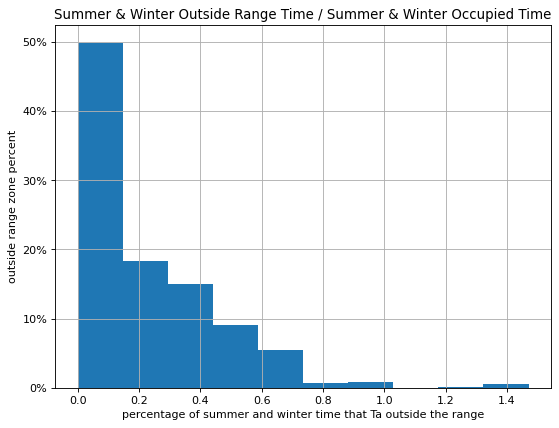

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x1, bins=10, weights=np.ones(len(x1))/len(x1))
plt.xlabel('percentage of summer and winter time that Ta outside the range')
plt.ylabel('outside range zone percent')
plt.title('Summer & Winter Outside Range Time / Summer & Winter Occupied Time')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

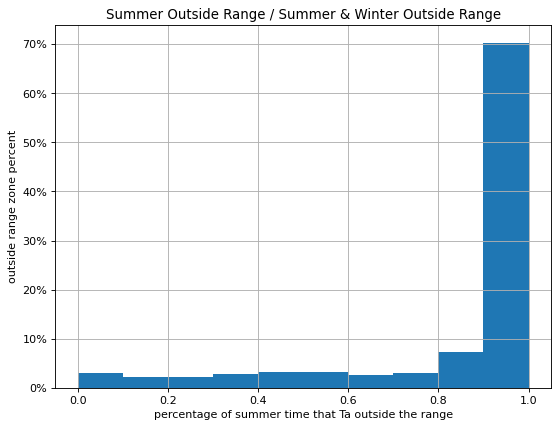

In [28]:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x2, bins=10, weights=np.ones(len(x2))/len(x2))
plt.xlabel('percentage of summer time that Ta outside the range')
plt.ylabel('outside range zone percent')
plt.title('Summer Outside Range / Summer & Winter Outside Range')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [27]:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x3, bins=10, weights=np.ones(len(x3))/len(x3))
plt.xlabel('percentage of summer time that Ta upper the range')
plt.ylabel('outside range zone percent')
plt.title('Summer Upper Range / Summer Outside Range')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x4, bins=10, weights=np.ones(len(x4))/len(x4))
plt.xlabel('percentage of winter time that Ta lower the range')
plt.ylabel('outside range zone percent')
plt.title('Winter Lower Range / Winter Outside Range')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

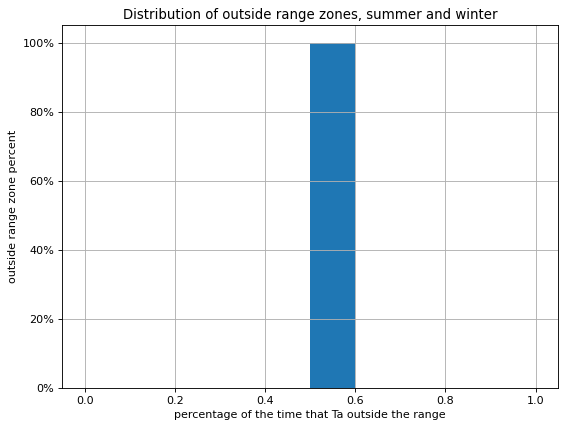

In [21]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x5, bins=10, weights=np.ones(len(x5))/len(x5))
plt.xlabel('percentage of the time that Ta outside the range')
plt.ylabel('outside range zone percent')
plt.title('Distribution of outside range zones, summer and winter')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

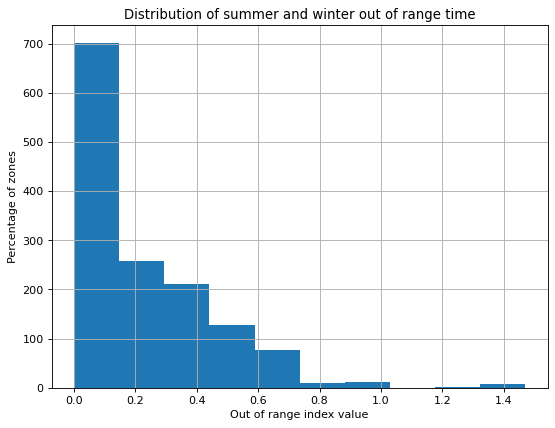

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
colors = ['red', 'blue']
labels = ['summer', 'winter']
plt.hist(x, bins=10, histtype='bar', color=colors, label=labels)
plt.xlabel('Out of range index value')
plt.ylabel('Percentage of zones')
plt.title('Distribution of summer and winter out of range time')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

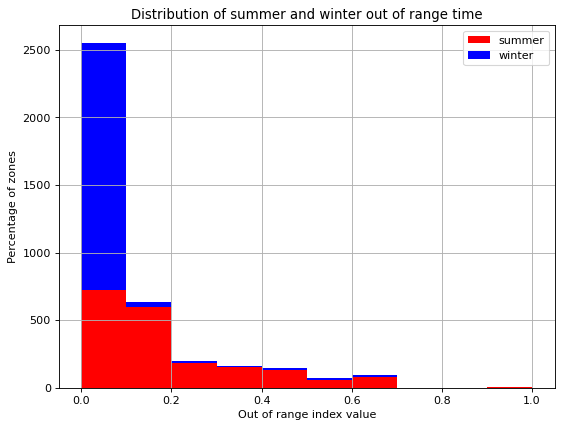

In [62]:
plt.figure(figsize=(8, 6), dpi=80)

colors = ['red', 'blue']
labels = ['summer', 'winter']
plt.hist(x, bins=10, histtype='bar', stacked=True, color=colors, label=labels)
plt.xlabel('Out of range index value')
plt.ylabel('Percentage of zones')
plt.title('Distribution of summer and winter out of range time')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()


In [41]:
x = []
for i in range(len(x11)):
    x += [[x11[i], x12[i], x21[i], x22[i], x31[i], x32[i]]]

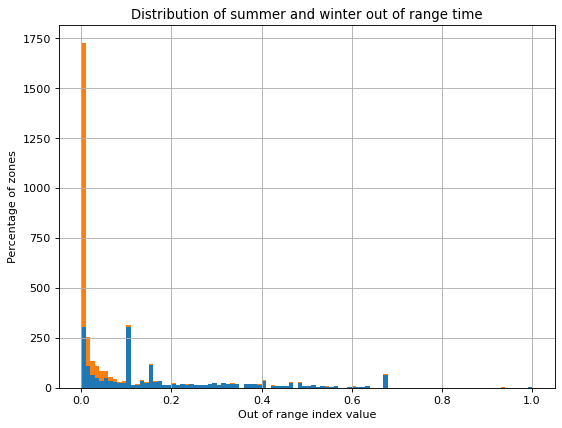

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.hist([x11, x12], bins=100, stacked=True)
plt.xlabel('Out of range index value')
plt.ylabel('Percentage of zones')
plt.title('Distribution of summer and winter out of range time')
plt.grid(True)
plt.show()

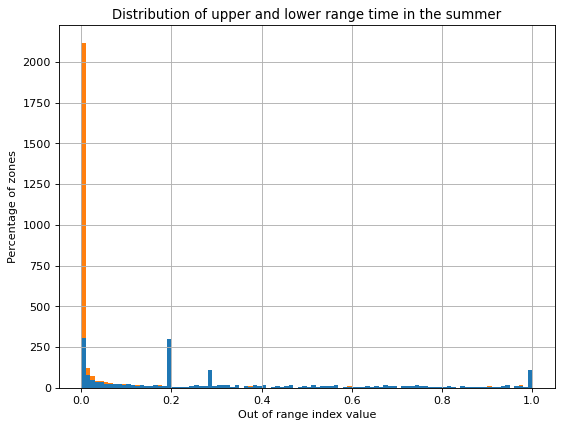

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.hist([x21, x22], bins=100, stacked=True)
plt.xlabel('Out of range index value')
plt.ylabel('Percentage of zones')
plt.title('Distribution of upper and lower range time in the summer')
plt.grid(True)
plt.show()

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.hist([x31, x32], bins=100, stacked=True)
plt.xlabel('Out of range index value')
plt.ylabel('Percentage of zones')
plt.title('Distribution of upper and lower range time in the winter')
plt.grid(True)
plt.show()

In [52]:
x = np.random.randn(1000, 3)

In [54]:
x

array([[-1.09236994,  1.21318092,  0.57949423],
       [-0.05705587, -1.14529652,  2.47896275],
       [ 1.81537273,  0.41885683,  0.92602234],
       ...,
       [ 2.25776326,  0.4369307 , -2.07665069],
       [-0.67152279,  1.33325522,  2.1701308 ],
       [-0.00341434,  2.18396995,  1.43632346]])

In [51]:
x

array([[0.47, 0.01],
       [0.01, 0.  ],
       [0.3 , 0.  ],
       ...,
       [0.05, 0.  ],
       [0.01, 0.  ],
       [0.49, 0.  ]])

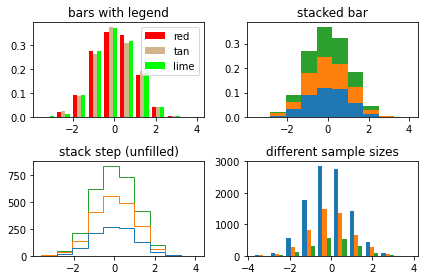

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

### Evaluation zone thermal comfort across all sites

In [ ]:
plt.hist([x1,x2,x3], bins, stacked=True, density=True)

In [8]:
# get dataset with URIs
query_res = client.data_uris(["http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp"])
query_res.data

time  value  \
0      2012-04-18 23:45:00+00:00  79.25   
1      2012-04-18 23:30:00+00:00  78.75   
2      2012-04-18 23:15:00+00:00  79.75   
3      2012-04-18 23:00:00+00:00  79.00   
4      2012-04-18 22:45:00+00:00  78.50   
...                          ...    ...   
227245 2017-11-30 22:30:00+00:00  71.00   
227246 2017-11-30 22:15:00+00:00  71.00   
227247 2017-11-30 22:00:00+00:00  71.00   
227248 2017-11-30 21:45:00+00:00  71.00   
227249 2017-11-30 21:30:00+00:00  71.00   

                                                       id  
0       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
1       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
2       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
3       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
4       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
...                                                   ...  
227245  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
227246  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
227247  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
227248  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
227249  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  

[227250 rows x 3 columns]

In [5]:
query_res

In [21]:
start = "2015-01-01T00:00:00Z"
end = "2015-12-31T00:00:00Z"
window = 15
sensor_df = client.data_uris(["http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp"], start=start, end=end, agg='mean', window="{}m".format(window))

In [22]:
sensor_df.data

time  value  \
0      2015-01-01 00:00:00+00:00  60.00   
1      2015-01-01 00:15:00+00:00  60.00   
2      2015-01-01 00:30:00+00:00  60.00   
3      2015-01-01 00:45:00+00:00  59.50   
4      2015-01-01 01:00:00+00:00  59.50   
...                          ...    ...   
100174 2017-12-29 08:15:00+00:00  64.50   
100175 2017-12-29 08:30:00+00:00  64.50   
100176 2017-12-29 08:45:00+00:00  64.25   
100177 2017-12-29 09:00:00+00:00  64.25   
100178 2017-12-29 09:15:00+00:00  64.25   

                                                       id  
0       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
1       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
2       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
3       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
4       http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
...                                                   ...  
100174  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
100175  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
100176  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
100177  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  
100178  http://buildsys.org/ontologies/ARTX#ARTX.ZONE....  

[100179 rows x 3 columns]

In [93]:
# df.reset_index(drop=True)
# df = data.set_index(['time'])
# df.sort_index(inplace=True, ascending=True)
# df = df[start_date:end_date]

In [95]:
# parse the hour and weekdays info from the datetime column
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['weekday'] = pd.to_datetime(df['time']).dt.dayofweek

<ipython-input-95-f1b87f66776d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df['time']).dt.hour
<ipython-input-95-f1b87f66776d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = pd.to_datetime(df['time']).dt.dayofweek


In [105]:
# create a new dataframe for the specified office hours and weekdays
df_occ = df[(df['hour'] >= a) & (df['hour'] < b) &
            (df['weekday'] >= 0) & (df['weekday'] <= 4)]
df_occ

time  value  \
101185 2016-01-20 16:45:00+00:00  72.50   
101186 2016-01-20 16:30:00+00:00  72.50   
101187 2016-01-20 16:15:00+00:00  72.50   
101188 2016-01-20 16:00:00+00:00  72.50   
101189 2016-01-20 15:45:00+00:00  72.50   
...                          ...    ...   
204037 2016-01-21 10:00:00+00:00  70.25   
204038 2016-01-21 09:45:00+00:00  70.25   
204039 2016-01-21 09:30:00+00:00  69.75   
204040 2016-01-21 09:15:00+00:00  70.25   
204041 2016-01-21 09:00:00+00:00  71.25   

                                                                             id  \
101185  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101186  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101187  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101188  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101189  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
...                                                                         ...   
204037  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204038  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204039  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204040  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204041  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   

        hour  weekday  
101185  16    2        
101186  16    2        
101187  16    2        
101188  16    2        
101189  15    2        
...     ..   ..        
204037  10    3        
204038  9     3        
204039  9     3        
204040  9     3        
204041  9     3        

[672 rows x 5 columns]

In [108]:
df_out = df_occ[(df_occ['value'] < l) | (df_occ['value'] > u)]
df_out

time  value  \
101195 2016-01-20 14:15:00+00:00  71.00   
101196 2016-01-20 14:00:00+00:00  70.50   
101197 2016-01-20 13:45:00+00:00  70.50   
101198 2016-01-20 13:30:00+00:00  71.00   
101199 2016-01-20 13:15:00+00:00  71.00   
...                          ...    ...   
204037 2016-01-21 10:00:00+00:00  70.25   
204038 2016-01-21 09:45:00+00:00  70.25   
204039 2016-01-21 09:30:00+00:00  69.75   
204040 2016-01-21 09:15:00+00:00  70.25   
204041 2016-01-21 09:00:00+00:00  71.25   

                                                                             id  \
101195  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101196  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101197  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101198  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
101199  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
...                                                                         ...   
204037  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204038  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204039  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204040  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   
204041  http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp   

        hour  weekday  
101195  14    2        
101196  14    2        
101197  13    2        
101198  13    2        
101199  13    2        
...     ..   ..        
204037  10    3        
204038  9     3        
204039  9     3        
204040  9     3        
204041  9     3        

[596 rows x 5 columns]

In [109]:
p = len(df_out) / len(df_occ)
p

0.8869047619047619

In [125]:
a='Beautiful, is; better*than\nugly'
import re
re.split('; |, |\*|\n',a)[-1]

'ugly'

In [120]:
id

'http://buildsys.org/ontologies/ARTX#ARTX.ZONE.AHU02.RM103.Zone_Air_Temp'

In [127]:
import re
# input sensors' metadata to thermal comfort index calculation package
for id in site_metadata.sensor:
    zone_name = re.split('[.]', id)[-2]
    

RM103
RM107B
RM112
RM110
RM115
RM120
RM100
RM107A
